In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import scipy
from collections import defaultdict
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

In [3]:
with open("mbr.txt") as f:
    data=f.readlines()

In [17]:
print len(["a","b","c","d","e","f","g","h","i","=","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","^","!","\"","#","$","%","&","\'","(",")","+","2","3","4","5","6","7","8","9","0",">","[","]",":","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","{","Y","Z","~","?","_","|","/","\\","}","@"])

83


In [4]:
tmp=[x.rstrip(",\n").replace("{","").replace("}","").split(",") for x in data][:-1]
df=pd.DataFrame(tmp, index=["a","b","c","d","e","f","g","h","i","=","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","^","!","\"","#","$","%","&","\'","(",")","+","2","3","4","5","6","7","8","9","0",">","[","]",":","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","{","Y","Z","~","?","_","|","/","\\","}","@"],columns=["a","b","c","d","e","f","g","h","i","=","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","^","!","\"","#","$","%","&","\'","(",")","+","2","3","4","5","6","7","8","9","0",">","[","]",":","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","{","Y","Z","~","?","_","|","/","\\","}","@"])

In [5]:
df=df.apply(pd.to_numeric)

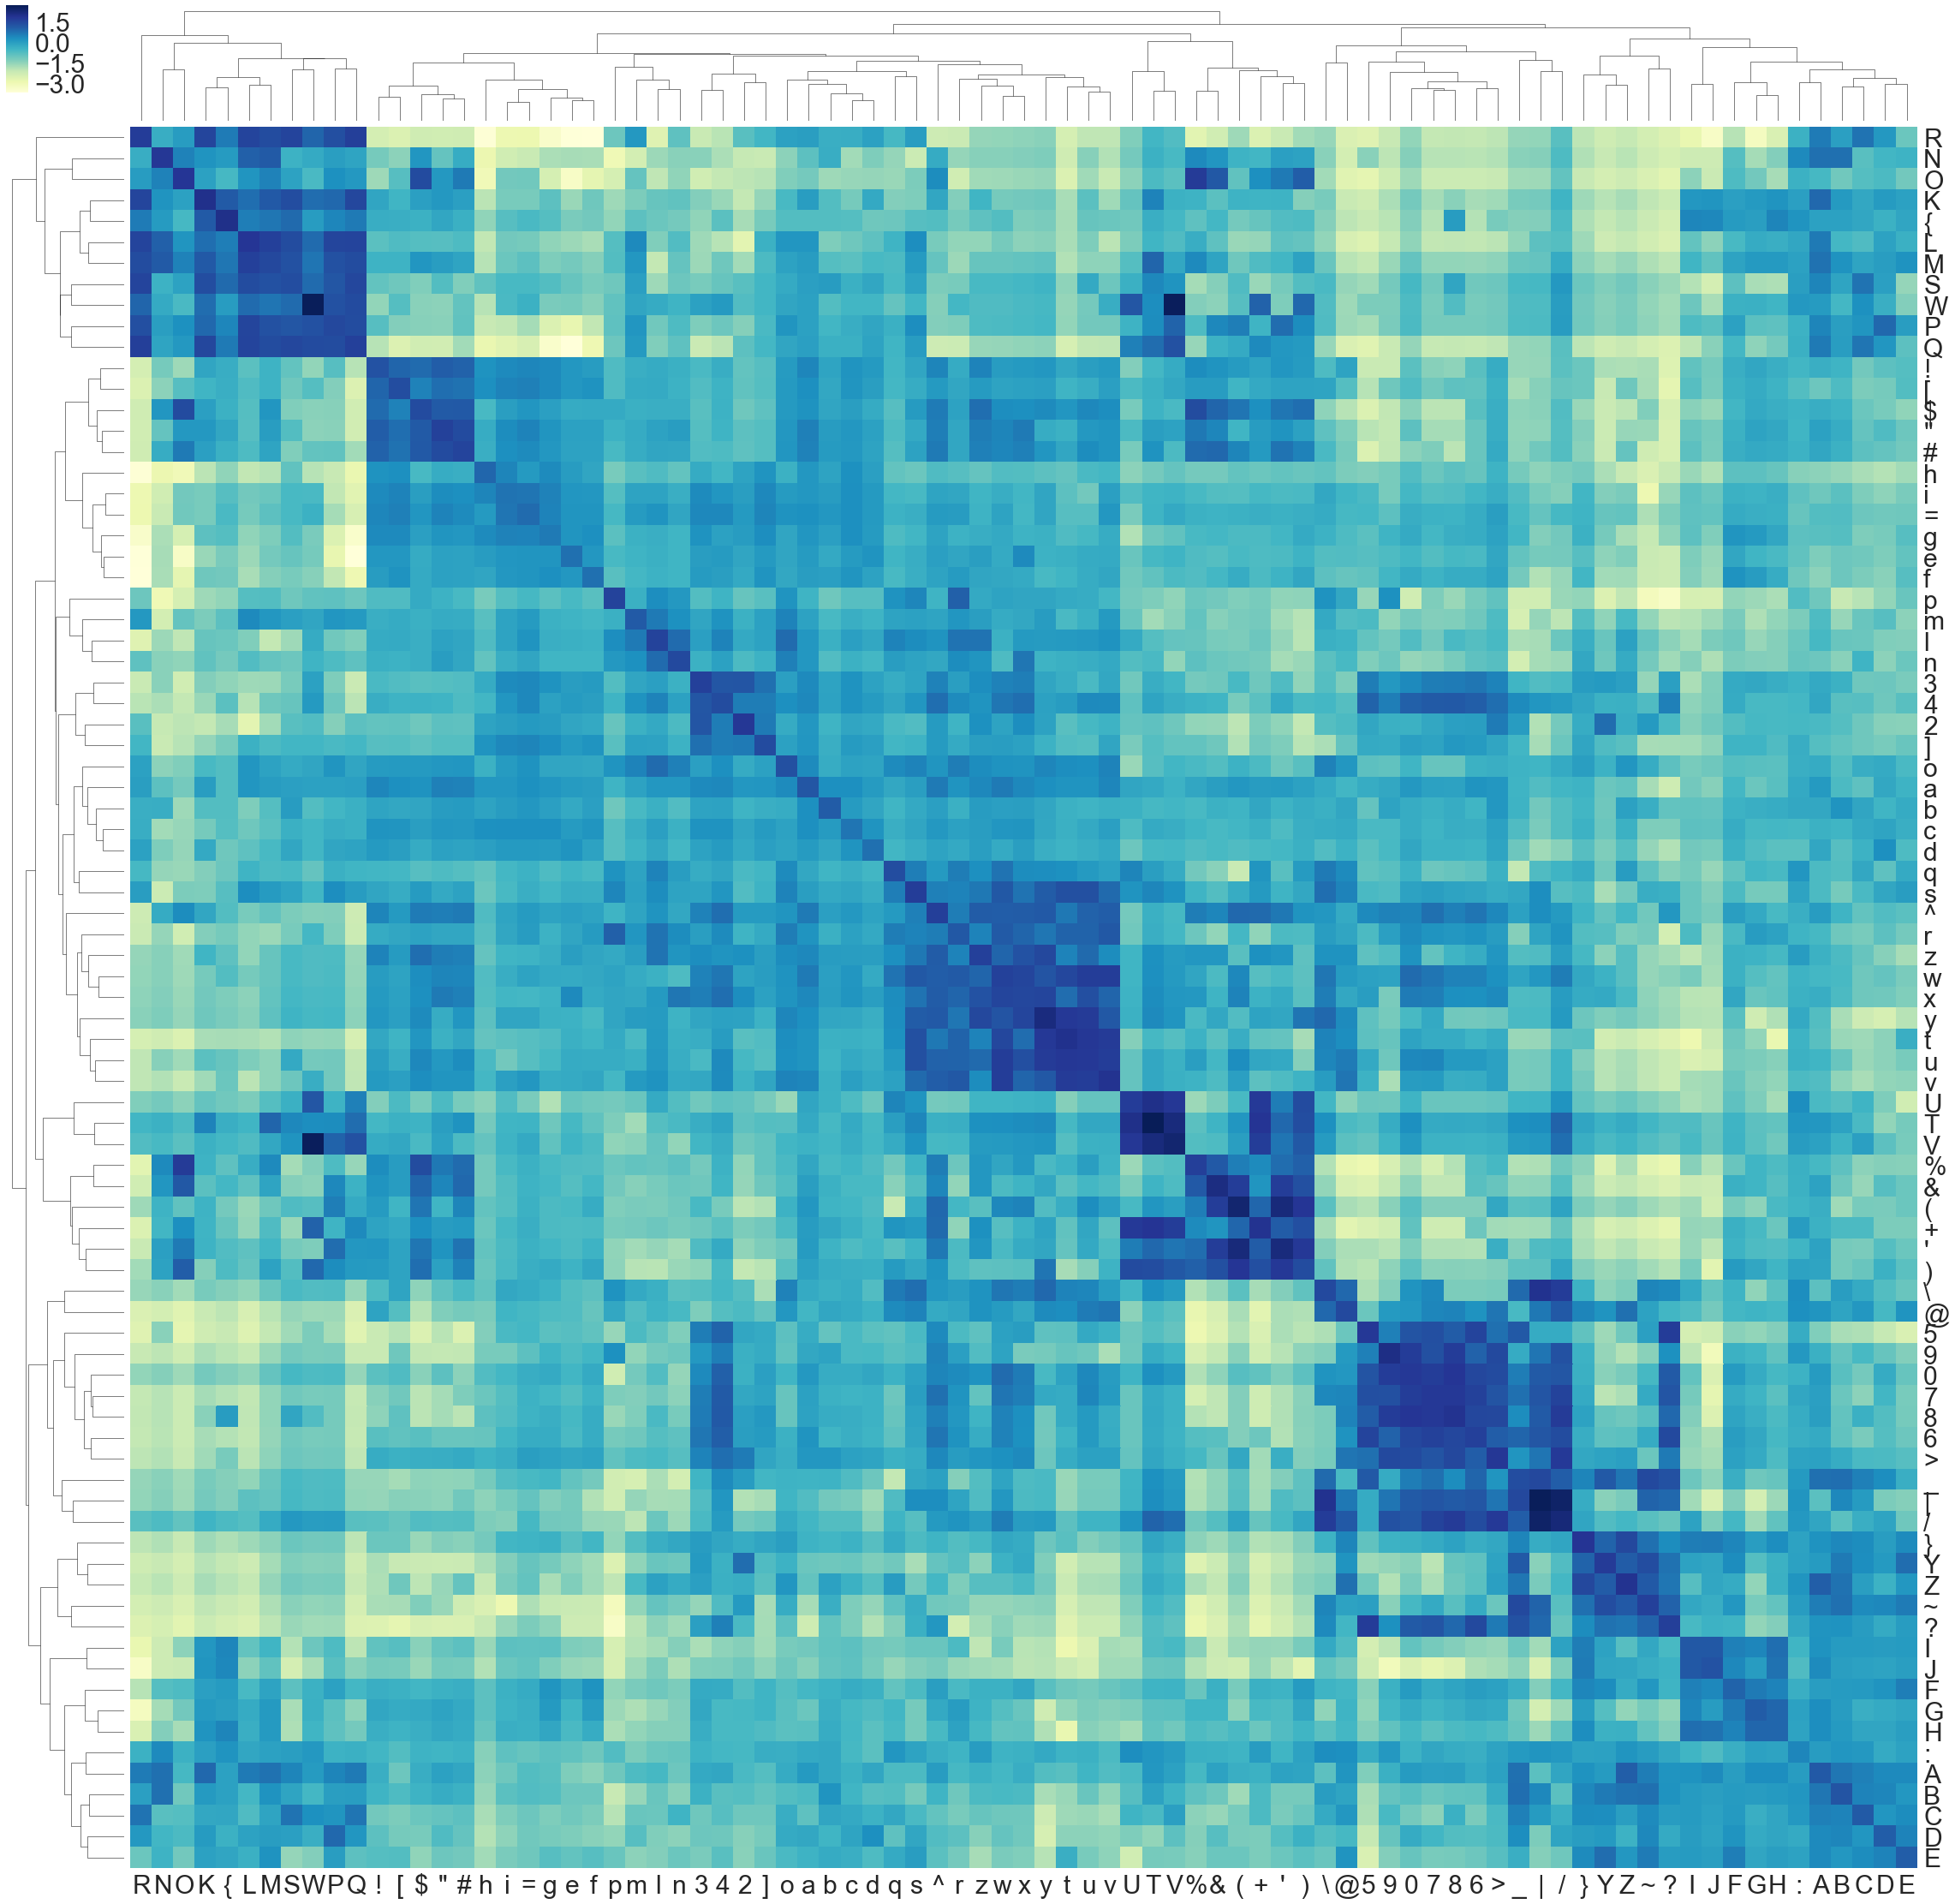

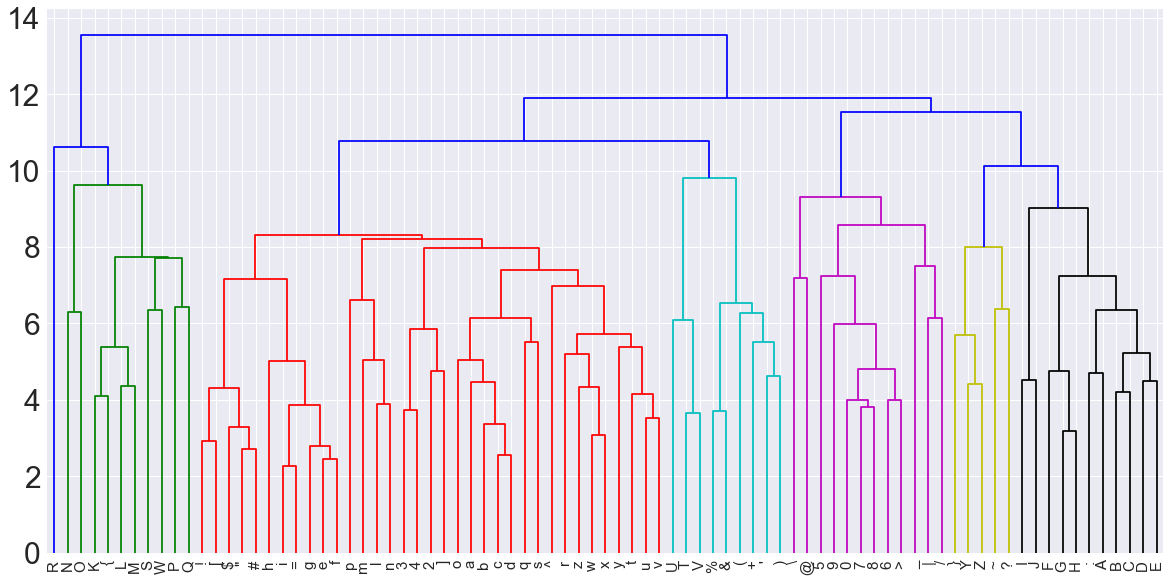

In [11]:
sns.set(font_scale=3.0)
g=sns.clustermap(df, cmap="YlGnBu", method='average', xticklabels=1, yticklabels=1, figsize=(40,40))
  
plt.show()


plt.figure(figsize=(20,10))

den = dendrogram(g.dendrogram_col.linkage, labels = df.index, color_threshold=10.0)
plt.xticks(fontsize=15)
#plt.savefig("dendrogram.pdf")

plt.show()
plt.close()



In [16]:
den

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'y',
  'y',
  'y',
  'y',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 6.2873092098313288, 6.2873092098313288, 0.0],
  [0.0, 4.089336934472013, 4.089336934472013, 0.0],
  [0.0, 4.3665530914858, 4.3665530914858, 0.0],
  [4.089336934472013, 5.3928527914399282, 5.3928527914399282, 4.3665530914858],
  [0.0, 6.3546636121244378, 6.3546636121244378, 0.0],
  [0.0, 6.4353688391982855, 6.4353688391982855, 0.0],
  [6.3546636121244378,
   7.7105951318613899,
   7.71059513

In [21]:
clust=den['color_list']

df['cluster']=clust

ValueError: Length of values does not match length of index

In [27]:

cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(den['ivl'][int(i)])
cluster_idxs

labels_pred=[]

for k in cluster_idxs:
    for el in cluster_idxs[k]:
        labels_pred.append([el,k])
        
        
print (cluster_idxs)

defaultdict(<type 'list'>, {'c': ['T', 'V', 'U', '%', '&', "'", ')', '+', '('], 'b': ['R', '{', 'O'], 'g': ['N', 'O', 'K', '{', 'L', 'M', 'S', 'W', 'P', 'Q'], 'k': ['I', 'J', 'G', 'H', 'F', ':', 'A', 'B', 'C', 'D', 'E', 'B'], 'm': ['\\', '@', '7', '8', '0', '6', '>', '9', '5', '|', '/', '_'], 'r': ['!', '[', '"', '#', '$', 'i', '=', 'e', 'f', 'g', 'h', 'l', 'n', 'm', 'p', '3', '4', '2', ']', 'c', 'd', 'b', 'a', 'o', 'q', 's', 'w', 'x', 'z', 'r', 'u', 'v', 't', 'y', '^'], 'y': ['Y', 'Z', '}', '~', '?']})


In [26]:

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

print clusters

cluster = []
for i in df.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

print clusters

{'c': ['T', 'V', 'U', '%', '&', "'", ')', '+', '('], 'b': ['R', '{', 'O'], 'g': ['N', 'O', 'K', '{', 'L', 'M', 'S', 'W', 'P', 'Q'], 'k': ['I', 'J', 'G', 'H', 'F', ':', 'A', 'B', 'C', 'D', 'E', 'B'], 'm': ['\\', '@', '7', '8', '0', '6', '>', '9', '5', '|', '/', '_'], 'r': ['!', '[', '"', '#', '$', 'i', '=', 'e', 'f', 'g', 'h', 'l', 'n', 'm', 'p', '3', '4', '2', ']', 'c', 'd', 'b', 'a', 'o', 'q', 's', 'w', 'x', 'z', 'r', 'u', 'v', 't', 'y', '^'], 'y': ['Y', 'Z', '}', '~', '?']}
{'c': ['T', 'V', 'U', '%', '&', "'", ')', '+', '('], 'b': ['R', '{', 'O'], 'g': ['N', 'O', 'K', '{', 'L', 'M', 'S', 'W', 'P', 'Q'], 'k': ['I', 'J', 'G', 'H', 'F', ':', 'A', 'B', 'C', 'D', 'E', 'B'], 'm': ['\\', '@', '7', '8', '0', '6', '>', '9', '5', '|', '/', '_'], 'r': ['!', '[', '"', '#', '$', 'i', '=', 'e', 'f', 'g', 'h', 'l', 'n', 'm', 'p', '3', '4', '2', ']', 'c', 'd', 'b', 'a', 'o', 'q', 's', 'w', 'x', 'z', 'r', 'u', 'v', 't', 'y', '^'], 'y': ['Y', 'Z', '}', '~', '?']}


In [99]:
for chiave in clusters:
    print len(clusters[chiave])


9
3
10
12
12
35
5
